<a href="https://colab.research.google.com/gist/Khanhdeeeptry/d2767e7bca3394a0216f40d4a679ebbe/phantichchuoithoigian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [46]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [47]:
path = "12.csv"
data = pd.read_csv(path)
data

,date,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,...,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6


In [48]:
msv = 2151264695
col = msv%12 + 1
data_12 = data[[str(col)]]
data_12.head(5)

,12
0,964.4
1,1019.7
2,988.4
3,1010.8
4,1061.5


In [49]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [50]:
print(f"Chọn cột số {col} để phân tích.")

Chọn cột số 12 để phân tích.


In [51]:
# Lấy dữ liệu từ cột được chọn
selected_data = data.iloc[:, col]

# Thực hiện Gaussian Mixture Model
gmm = GaussianMixture(n_components=2) # Số components có thể điều chỉnh
gmm.fit(selected_data.values.reshape(-1, 1))
gmm_labels = gmm.predict(selected_data.values.reshape(-1, 1))

# Thực hiện KMeans clustering
kmeans = KMeans(n_clusters=2, n_init=10) # Số clusters có thể điều chỉnh
kmeans.fit(selected_data.values.reshape(-1, 1))
kmeans_labels = kmeans.predict(selected_data.values.reshape(-1, 1))

# Thực hiện DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Tham số có thể điều chỉnh
dbscan_labels = dbscan.fit_predict(selected_data.values.reshape(-1, 1))

# Mô tả kịch bản tách dữ liệu
print("\nKịch bản tách data:")
print("Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.")
print(f"Chọn cột số {col} để phân tích.")
print("Sử dụng Gaussian Mixture Model với số components là 2, KMeans clustering với số clusters là 2, và DBSCAN để phân tích dữ liệu.")

C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Kịch bản tách data:
Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.
Chọn cột số 12 để phân tích.
Sử dụng Gaussian Mixture Model với số components là 2, KMeans clustering với số clusters là 2, và DBSCAN để phân tích dữ liệu.


In [52]:
# In ra kết quả của mỗi mô hình
print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)
print("\nDBSCAN labels:")
print(dbscan_labels)

Gaussian Mixture Model labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

KMeans labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

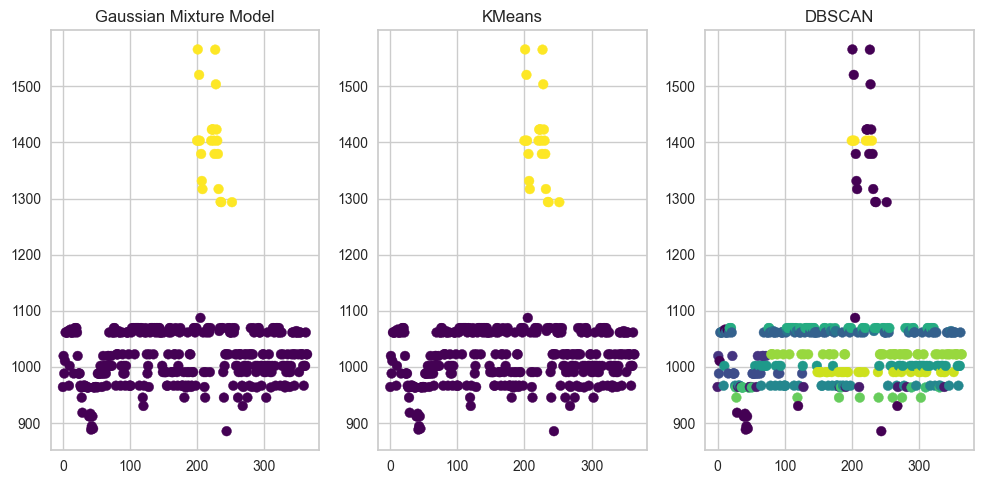

In [53]:
import matplotlib.pyplot as plt

# Biểu đồ Gaussian Mixture Model
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(range(len(selected_data)), selected_data, c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model')

# Biểu đồ KMeans
plt.subplot(1, 3, 2)
plt.scatter(range(len(selected_data)), selected_data, c=kmeans_labels, cmap='viridis')
plt.title('KMeans')

# Biểu đồ DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(range(len(selected_data)), selected_data, c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')

plt.tight_layout()
plt.show()


In [54]:
# Lấy dữ liệu từ cột được chọn
selected_data = data.iloc[:, col]

TÌm cụm tối ưu Kmeans


C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.p

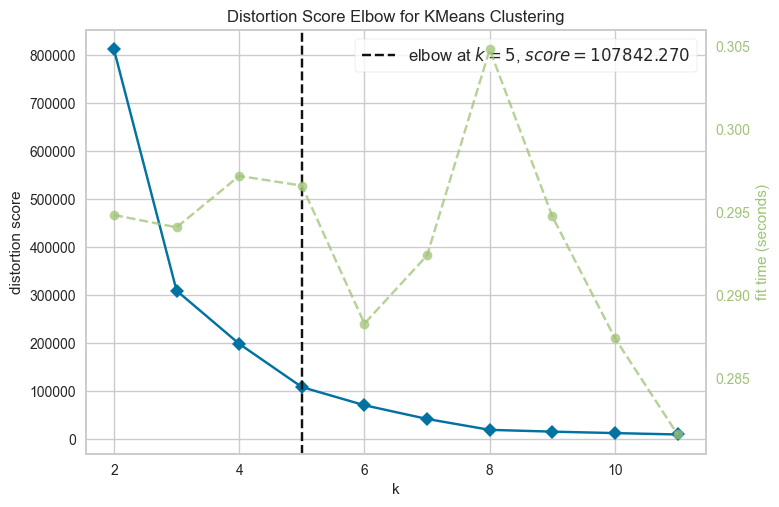

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
from yellowbrick.cluster import KElbowVisualizer
print('TÌm cụm tối ưu Kmeans')
selected_data_2d = selected_data.values.reshape(-1, 1)
kmeans = KMeans(random_state=23, n_init=10)
Elbow_M = KElbowVisualizer(kmeans, k=(2, 12))
Elbow_M.fit(selected_data_2d)
Elbow_M.show()

In [56]:
k = 5
# Thực hiện Gaussian Mixture Model
gmm = GaussianMixture(n_components=k) # Số components có thể điều chỉnh
gmm.fit(selected_data.values.reshape(-1, 1))
gmm_labels = gmm.predict(selected_data.values.reshape(-1, 1))

# Thực hiện KMeans clustering
kmeans = KMeans(n_clusters=k, n_init=10) # Số clusters có thể điều chỉnh
kmeans.fit(selected_data.values.reshape(-1, 1))
kmeans_labels = kmeans.predict(selected_data.values.reshape(-1, 1))

# Thực hiện DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Tham số có thể điều chỉnh
dbscan_labels = dbscan.fit_predict(selected_data.values.reshape(-1, 1))


# Mô tả kịch bản tách dữ liệu
print("\nKịch bản tách data:")
print("Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.")
print(f"Chọn cột số {col} để phân tích.")
print("Sử dụng Gaussian Mixture Model với số components là 2, KMeans clustering với số clusters là 2, và DBSCAN để phân tích dữ liệu.")

C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\MSI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Kịch bản tách data:
Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.
Chọn cột số 12 để phân tích.
Sử dụng Gaussian Mixture Model với số components là 2, KMeans clustering với số clusters là 2, và DBSCAN để phân tích dữ liệu.


In [57]:
# In ra kết quả của mỗi mô hình
print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)
print("\nDBSCAN labels:")
print(dbscan_labels)

Gaussian Mixture Model labels:
[2 3 2 3 0 0 0 0 0 2 3 0 0 0 0 0 2 0 0 0 0 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 3 3 2 2 3 3 3 0 3 3 3 3
 0 0 0 0 0 2 3 3 3 0 0 0 2 3 0 3 2 3 2 2 3 0 0 0 3 2 2 2 0 0 0 0 0 3 0 0 0
 0 0 0 2 0 0 0 0 2 2 2 0 0 0 3 2 3 2 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 3 3 0 3 3 3 3 2 2 3 0 0 0 0 3 3 3 2 3 3 0 0 3 2 3 3 0 0 0 2 2 2 3 2 2 2 2
 3 0 2 3 3 3 2 2 3 3 0 0 0 2 0 1 1 1 1 1 2 1 1 4 0 3 2 2 3 0 0 0 0 0 3 0 1
 1 1 1 1 1 1 1 1 1 1 4 0 0 4 4 0 0 3 2 3 3 3 2 3 0 3 0 0 0 0 4 0 2 0 0 3 3
 3 3 2 3 3 3 3 3 2 2 2 3 3 3 3 3 2 3 3 2 3 0 3 2 3 0 0 0 3 3 2 3 0 0 0 0 3
 2 3 3 3 3 3 3 2 3 0 3 3 3 3 2 3 3 0 0 0 3 2 0 0 0 0 0 0 2 3 0 3 3 3 2 2 2
 3 3 3 3 3 2 3 3 3 0 0 3 2 3 0 0 0 0 3 3 0 0 3 3 3 3 2 3 3 0 3 3]

KMeans labels:
[2 3 3 3 0 0 0 0 0 2 3 0 0 0 0 0 3 0 0 0 0 0 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 0 3 3 3 3
 0 0 0 0 0 2 3 3 3 0 0 0 2 3 0 3 3 3 3 2 3 0 0 0 3 2 2 2 0 0 0